In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import os
import cv2

In [6]:
# functions for image processing
#! add contrast to the image 
def contrast(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

#! add brightness to the image
def brightness(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

#! add gamma to the image
def gamma(img, gamma):
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img, gamma_table)

#! add blur to the image
def blur(img, ksize):
    return cv2.blur(img, (ksize, ksize))

#! add sharpen to the image
def sharpen(img):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

#! add emboss to the image
def emboss(img, ksize):
    kernel = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
    return cv2.filter2D(img, -1, kernel)

#! add edge detection to the image
def edge_detection(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

#! grayscale the image
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#! grayscale the images and resize them to 100x100

def grayscale_and_resize(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    return img

In [3]:
actinic_keratosis_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis')

basal_cell_carcinoma_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma')

dermatofibroma_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma')

melanoma_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma')

nevus_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus')

pigmented_benign_keratosis_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis')

seborrheic_keratosis_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis')

squamous_cell_carcinoma_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma')

vascular_lesion_train = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion')

actinic_keratosis_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis')

basal_cell_carcinoma_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma')

dermatofibroma_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma')

melanoma_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma')

nevus_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus')

pigmented_benign_keratosis_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis')

seborrheic_keratosis_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis')

squamous_cell_carcinoma_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma')

vascular_lesion_test = os.listdir(
    '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion')

Number of actinic keratosis train images:  114


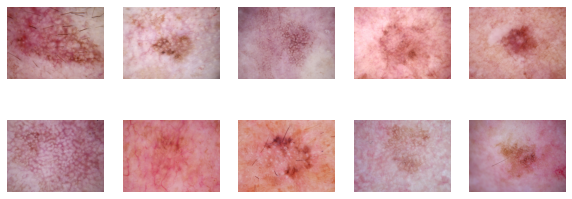

Number of basal cell carcinoma train images:  376


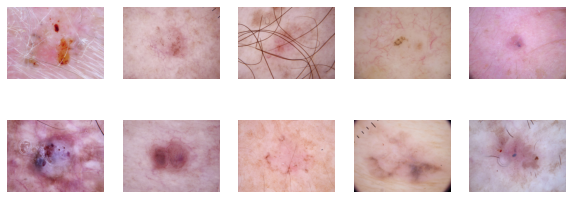

Number of dermatofibroma train images:  95


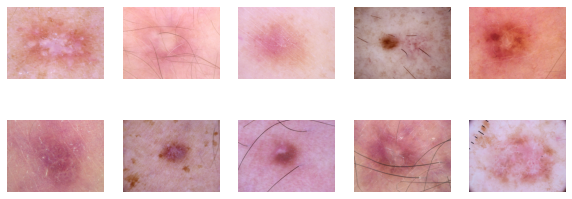

Number of melanoma train images:  438


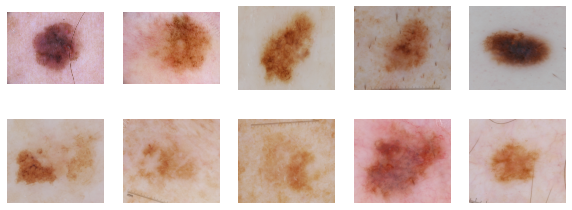

Number of nevus train images:  357


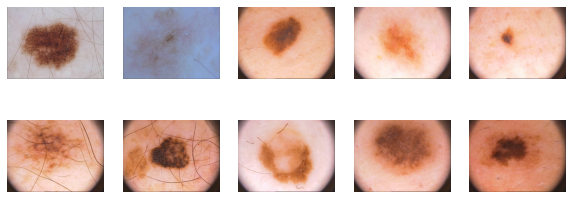

Number of pigmented benign keratosis train images:  462


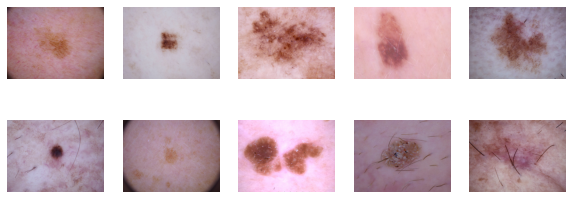

Number of seborrheic keratosis train images:  77


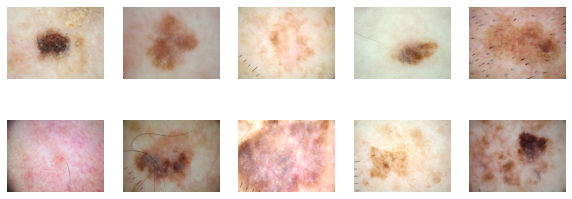

Number of squamous cell carcinoma train images:  181


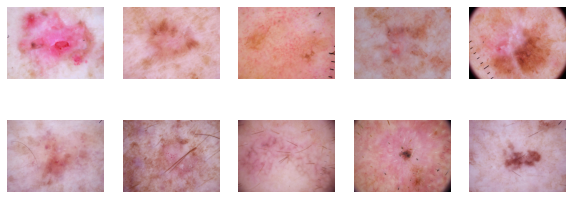

Number of vascular lesion train images:  139


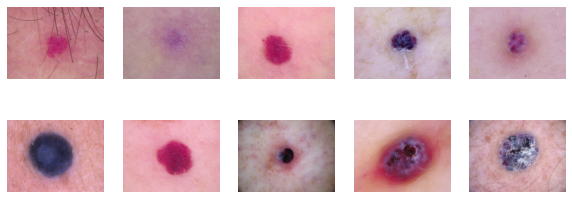

In [4]:
print('Number of actinic keratosis train images: ', len(actinic_keratosis_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/' + actinic_keratosis_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of basal cell carcinoma train images: ', len(basal_cell_carcinoma_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/' + basal_cell_carcinoma_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of dermatofibroma train images: ', len(dermatofibroma_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/' + dermatofibroma_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of melanoma train images: ', len(melanoma_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/' + melanoma_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of nevus train images: ', len(nevus_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/' + nevus_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of pigmented benign keratosis train images: ', len(pigmented_benign_keratosis_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/' + pigmented_benign_keratosis_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of seborrheic keratosis train images: ', len(seborrheic_keratosis_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/' + seborrheic_keratosis_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of squamous cell carcinoma train images: ', len(squamous_cell_carcinoma_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/' + squamous_cell_carcinoma_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of vascular lesion train images: ', len(vascular_lesion_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/' + vascular_lesion_train[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

Number of actinic keratosis test images:  16


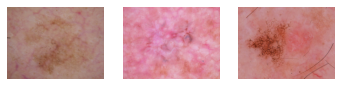

Number of basal cell carcinoma test images:  16


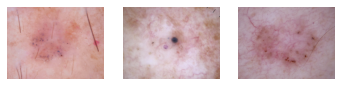

Number of dermatofibroma test images:  16


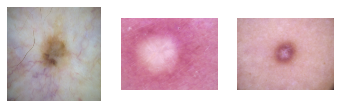

Number of melanoma test images:  16


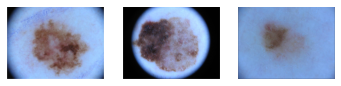

Number of nevus test images:  16


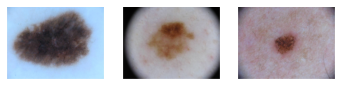

Number of pigmented benign keratosis test images:  16


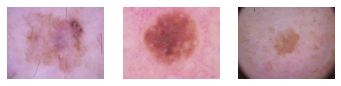

Number of seborrheic keratosis test images:  3


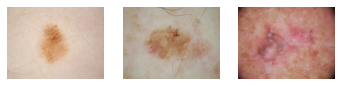

Number of squamous cell carcinoma test images:  16


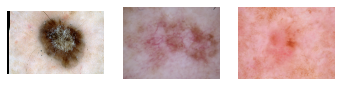

Number of vascular lesion test images:  3


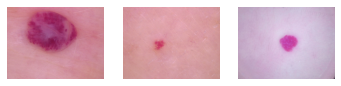

In [5]:
print('Number of actinic keratosis test images: ', len(actinic_keratosis_test))
# show only 3 images
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/' + actinic_keratosis_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of basal cell carcinoma test images: ', len(basal_cell_carcinoma_test))
# show only 3 images
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/' + basal_cell_carcinoma_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of dermatofibroma test images: ', len(dermatofibroma_test))
# show only 3 images
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/' + dermatofibroma_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of melanoma test images: ', len(melanoma_test))
# show only 3 images
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/' + melanoma_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of nevus test images: ', len(nevus_test))

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus/' + nevus_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of pigmented benign keratosis test images: ', len(pigmented_benign_keratosis_test))

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/' + pigmented_benign_keratosis_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of seborrheic keratosis test images: ', len(seborrheic_keratosis_test))

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis/' + seborrheic_keratosis_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of squamous cell carcinoma test images: ', len(squamous_cell_carcinoma_test))

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/' + squamous_cell_carcinoma_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

print('Number of vascular lesion test images: ', len(vascular_lesion_test))

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion/' + vascular_lesion_test[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [11]:
# grayscale and sharpen training images and save them to '../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/grayscaled/Train/'

# grayscale and sharpen  actinic keratosis images
for i in range(len(actinic_keratosis_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/' + actinic_keratosis_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/actinic keratosis/' + actinic_keratosis_train[i], img)

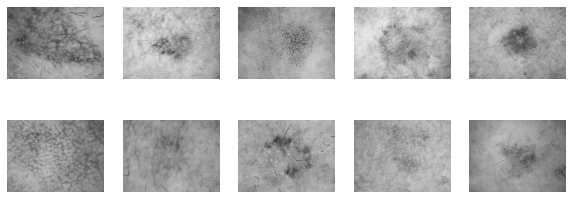

In [13]:
# plot grayscale images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/actinic keratosis/' + actinic_keratosis_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


In [22]:

# grayscale and sharpen basal cell carcinoma images
for i in range(len(basal_cell_carcinoma_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/' + basal_cell_carcinoma_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/basal cell carcinoma/' + basal_cell_carcinoma_train[i], img) 

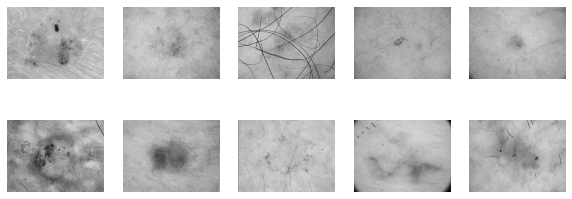

In [23]:

# plot grayscale images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/basal cell carcinoma/' + basal_cell_carcinoma_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [24]:

# grayscale and sharpen  dermatofibroma images
for i in range(len(dermatofibroma_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/' + dermatofibroma_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/dermatofibroma/' + dermatofibroma_train[i], img)

    

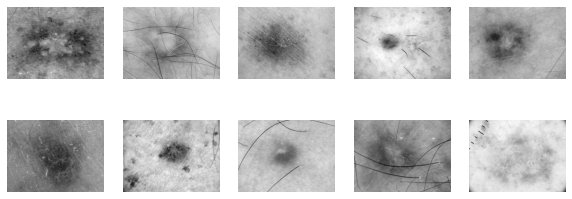

In [25]:

# plot grayscale images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/grayscaled/Train/dermatofibroma/' + dermatofibroma_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()



In [26]:

# grayscale and sharpen  melanoma images

for i in range(len(melanoma_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/' + melanoma_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/melanoma/' + melanoma_train[i], img)

    

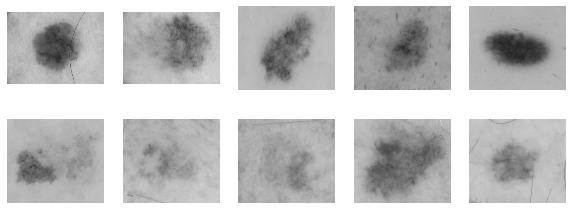

In [27]:

# plot grayscale images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/melanoma/' + melanoma_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()

In [28]:

# grayscale  nevus images

for i in range(len(nevus_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/' + nevus_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/nevus/' + nevus_train[i], img)

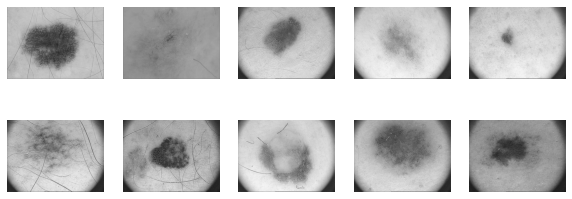

In [29]:

# plot grayscale images

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/nevus/' + nevus_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [30]:

# grayscale and sharpen pigmented benign keratosis images

for i in range(len(pigmented_benign_keratosis_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/' + pigmented_benign_keratosis_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/pigmented benign keratosis/' + pigmented_benign_keratosis_train[i], img)

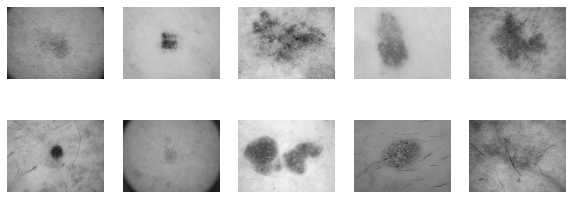

In [31]:

# plot grayscale images

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/pigmented benign keratosis/' + pigmented_benign_keratosis_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [32]:

# grayscale seborrheic keratosis images

for i in range(len(seborrheic_keratosis_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/' + seborrheic_keratosis_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/seborrheic keratosis/' + seborrheic_keratosis_train[i], img)

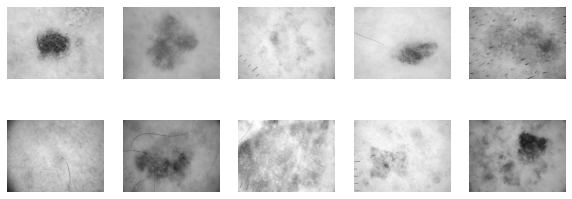

In [33]:

# plot grayscale images

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/seborrheic keratosis/' + seborrheic_keratosis_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [34]:

# grayscale squamous cell carcinoma images

for i in range(len(squamous_cell_carcinoma_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/' + squamous_cell_carcinoma_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/squamous cell carcinoma/' + squamous_cell_carcinoma_train[i], img)

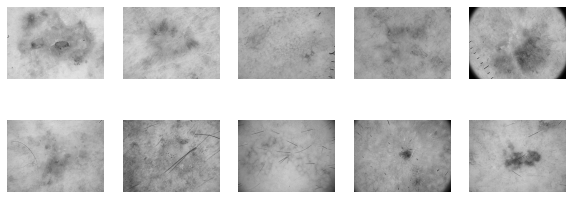

In [35]:

# plot grayscale images

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/squamous cell carcinoma/' + squamous_cell_carcinoma_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [36]:

# grayscale vascular lesion images

for i in range(len(vascular_lesion_train)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/' + vascular_lesion_train[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/vascular lesion/' + vascular_lesion_train[i], img)

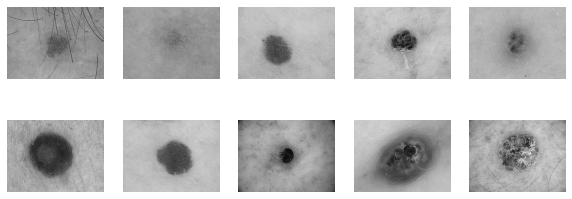

In [37]:

# plot grayscale images

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Train/vascular lesion/' + vascular_lesion_train[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [38]:

# perform same operations for test iimages

# grayscale actinic keratosis images

for i in range(len(actinic_keratosis_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/' + actinic_keratosis_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/actinic keratosis/' + actinic_keratosis_test[i], img)

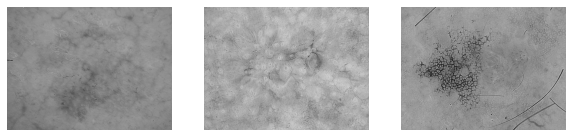

In [39]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/actinic keratosis/' + actinic_keratosis_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [40]:

# grayscale basal cell carcinoma images

for i in range(len(basal_cell_carcinoma_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/' + basal_cell_carcinoma_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/basal cell carcinoma/' + basal_cell_carcinoma_test[i], img)

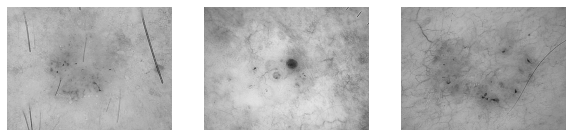

In [41]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/basal cell carcinoma/' + basal_cell_carcinoma_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [42]:

# grayscale dermatofibroma images

for i in range(len(dermatofibroma_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/' + dermatofibroma_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/dermatofibroma/' + dermatofibroma_test[i], img)
    

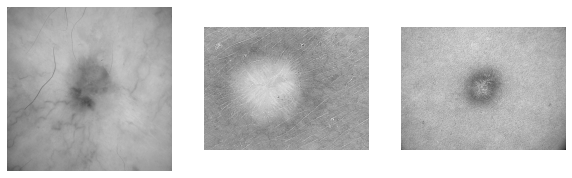

In [43]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/dermatofibroma/' + dermatofibroma_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [44]:

# grayscale melanoma images

for i in range(len(melanoma_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/' + melanoma_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/melanoma/' + melanoma_test[i], img)

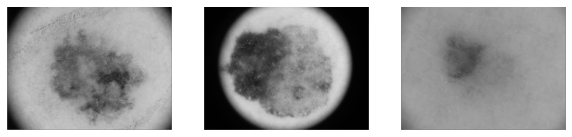

In [45]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/melanoma/' + melanoma_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [46]:

# grayscale nevus images

for i in range(len(nevus_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus/' + nevus_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/nevus/' + nevus_test[i], img)

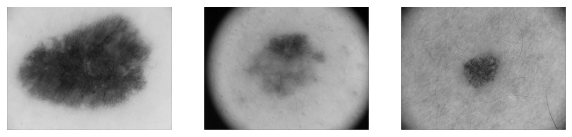

In [47]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/nevus/' + nevus_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [48]:

# grayscale pigmented benign keratosis images

for i in range(len(pigmented_benign_keratosis_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/' + pigmented_benign_keratosis_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/pigmented benign keratosis/' + pigmented_benign_keratosis_test[i], img)

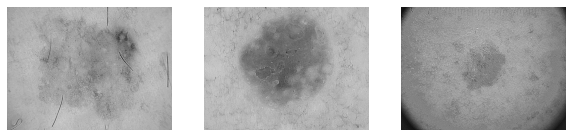

In [49]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/pigmented benign keratosis/' + pigmented_benign_keratosis_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [50]:

# grayscale seborrheic keratosis images

for i in range(len(seborrheic_keratosis_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis/' + seborrheic_keratosis_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/seborrheic keratosis/' + seborrheic_keratosis_test[i], img)
    

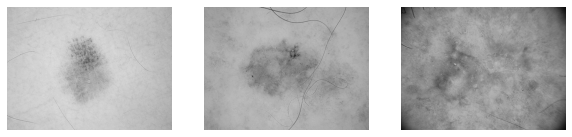

In [51]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/seborrheic keratosis/' + seborrheic_keratosis_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [52]:

# grayscale squamous cell carcinoma images

for i in range(len(squamous_cell_carcinoma_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/' + squamous_cell_carcinoma_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/squamous cell carcinoma/' + squamous_cell_carcinoma_test[i], img)

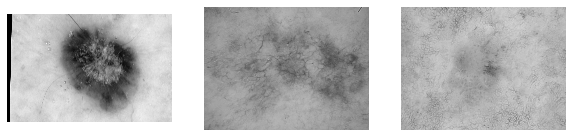

In [53]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/squamous cell carcinoma/' + squamous_cell_carcinoma_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [54]:

# grayscale vascular lesion images

for i in range(len(vascular_lesion_test)):
    img = cv2.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion/' + vascular_lesion_test[i], cv2.IMREAD_GRAYSCALE)
    img = sharpen(img)
    cv2.imwrite('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/vascular lesion/' + vascular_lesion_test[i], img)

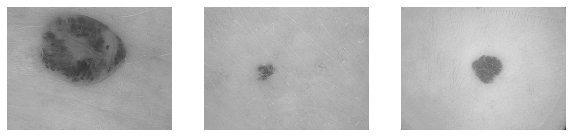

In [55]:

# plot 3 grayscale images

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = mpimg.imread('../dataset/Skin cancer ISIC The International Skin Imaging Collaboration/sharpened/Test/vascular lesion/' + vascular_lesion_test[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()